### Regularisation  

Polynomial examples

In [58]:
import numpy as np
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

In [59]:
def fmap_poly(tobs,n):
    A = np.zeros((len(tobs),n))
    for i, ti in enumerate(tobs):
        #A[i,:] = np.array([1,10*ti,-0.5*ti**2])
        A[i,:] = np.array([ti**j for j in range(0,n)])
    return A

In [60]:
#fine time grid
t = np.linspace(0,1,1000)

#observation times
#tobs = np.array([1,13]) #under-determined
tobs = np.array([0.0,0.1,0.4,0.7,1.0]) #over-determined

order = 10
Ap_obs = fmap_poly(tobs,n=order)
Ap_fine = fmap_poly(t,n=order)

In [61]:
#parameters
thetap_true = np.zeros(order)
thetap_true[1] = 1
thetap_true[2] = 10
thetap_true

array([  0.,   1.,  10.,   0.,   0.,   0.,   0.,   0.,   0.,   0.])

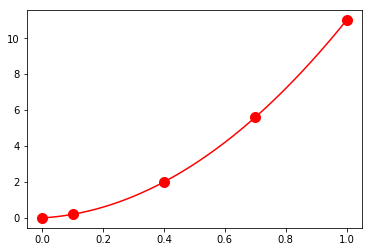

In [62]:
#fine and obs
plt.plot(tobs,np.dot(Ap_obs,thetap_true),'ro',markersize=10)
#plt.plot(tobs,yp_obs,'ro',markersize=10)

plt.plot(t,np.dot(Ap_fine,thetap_true),'r')
#plt.plot(t,np.dot(Atrue,theta_min),'b')
plt.show()

In [87]:
#observed data
#yp_obs = np.dot(Ap_obs,thetap_true)
yp_obs = np.dot(Ap_obs,thetap_true) + np.random.normal(0,1.0,size=len(tobs)) #with noise

#invert
Ap_obs_pinv = np.linalg.pinv(Ap_obs)
thetap_min = np.dot(Ap_obs_pinv,yp_obs)

In [88]:
print(thetap_min)
print(thetap_true)

[  0.43458213 -24.81296717  80.03423016  -8.92353134 -34.86760772
 -28.37125087 -12.94825018   2.29933733  14.76337007  24.20549425]
[  0.   1.  10.   0.   0.   0.   0.   0.   0.   0.]


In [89]:
print(np.linalg.norm(thetap_min,2))
print(np.linalg.norm(thetap_true,2))

100.491117703
10.0498756211


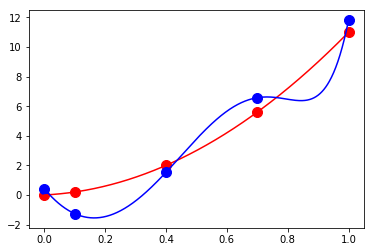

In [90]:
#key figure: simplest, within perfect fit class...
plt.plot(tobs,np.dot(Ap_obs,thetap_true),'ro',markersize=10)
plt.plot(tobs,yp_obs,'bo',markersize=10)

plt.plot(t,np.dot(Ap_fine,thetap_true),'r')
plt.plot(t,np.dot(Ap_fine,thetap_min),'b')
plt.show()

#### Tikhonov

In [91]:
yp_obs = np.dot(Ap_obs,thetap_true) + np.random.normal(0,0.8,size=len(tobs)) #with noise

In [129]:
alpha = 0.4
#alpha = 0.0

In [130]:
b = np.zeros(len(thetap_true))

In [131]:
yp_aug = np.hstack([yp_obs,b])

In [132]:
I = np.eye(len(thetap_true))
#I[0,0] = 0

In [133]:
#augment
Ap_aug = np.vstack([Ap_obs,alpha*I])

#invert
Ap_aug_pinv = np.linalg.pinv(Ap_aug)
thetap_aug_min = np.dot(Ap_aug_pinv,yp_aug)

In [134]:
print(np.linalg.norm(thetap_aug_min[1:],2))
print(np.linalg.norm(thetap_true[1:],2))

3.59510693991
10.0498756211


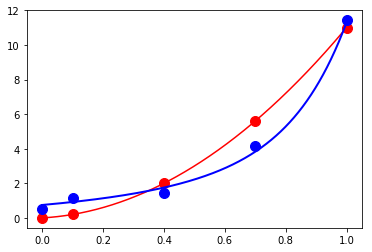

In [135]:
#key figure: simplest, within perfect fit class...
plt.plot(tobs,np.dot(Ap_obs,thetap_true),'ro',markersize=10)
#plt.plot(tobs,np.dot(Ap_obs,thetap_aug_min),'bo',markersize=10)
plt.plot(tobs,yp_obs,'bo',markersize=10)

plt.plot(t,np.dot(Ap_fine,thetap_true),'r')
#plt.plot(t,np.dot(Ap_fine,thetap_min),'b--')
plt.plot(t,np.dot(Ap_fine,thetap_aug_min),'b',linewidth=2)
plt.show()

#### Loop

In [140]:
alphav = np.logspace(-2.0, 0.5, num=1000)

In [141]:
thetas = np.zeros((len(alphav),len(thetap_true)))
theta_norms = np.zeros(len(alphav))
data_norms = np.zeros(len(alphav))
I = np.eye(len(thetap_true))
#I[0,0] = 0
                  
for i, alphai in enumerate(alphav):
                  
    #augment
    Ap_aug = np.vstack([Ap_obs,alphai*I])

    #invert
    Ap_aug_pinv = np.linalg.pinv(Ap_aug)
    thetas[i,:] = np.dot(Ap_aug_pinv,yp_aug)
    
    #calc norms
    theta_norms[i] = np.linalg.norm(thetas[i,:],2)
    data_norms[i] = np.linalg.norm(yp_obs - np.dot(Ap_obs,thetas[i,:]))
    

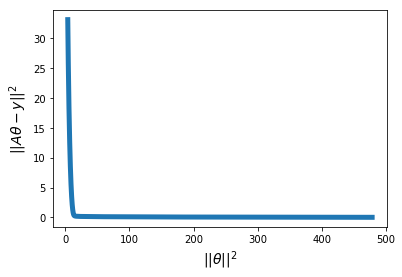

In [142]:
plt.plot(theta_norms**2,data_norms**2,linewidth=5)
plt.ylabel(r'$||A\theta-y||^2$',fontsize=14)
plt.xlabel(r'$||\theta||^2$',fontsize=14)
plt.show()

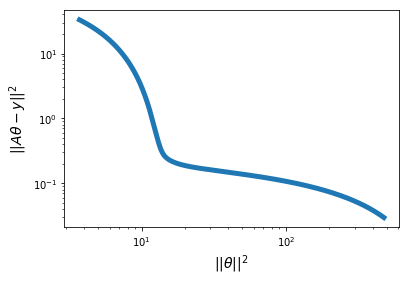

In [143]:
plt.loglog(theta_norms**2,data_norms**2,linewidth=5)
plt.ylabel(r'$||A\theta-y||^2$',fontsize=14)
plt.xlabel(r'$||\theta||^2$',fontsize=14)
plt.show()

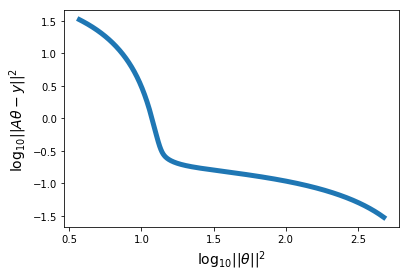

In [144]:
plt.plot(np.log10(theta_norms**2),np.log10(data_norms**2),linewidth=5)
plt.ylabel(r'$\log_{10}||A\theta-y||^2$',fontsize=14)
plt.xlabel(r'$\log_{10}||\theta||^2$',fontsize=14)
plt.show()

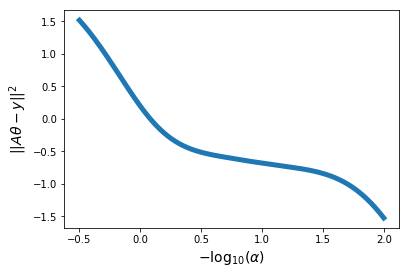

In [145]:
#plt.plot(alphav,data_norms**2,linewidth=5)
plt.plot(-np.log10(alphav),np.log10(data_norms**2),linewidth=5)
plt.ylabel(r'$||A\theta-y||^2$',fontsize=14)
plt.xlabel(r'$-\log_{10}(\alpha)$',fontsize=14)
#plt.xlabel(r'$\alpha$',fontsize=14)
plt.show()